## Escalado de variables: estandarización Z-score y escalado Min-Max 

<a id='Sections'></a>
- <a href='#Estandarizacion'>Acerca de la estandarización</a>
- <a href='#Min-Max'>Acerca del escalado Min-Max</a>
- <a href='#Estandarizacion_Min_Max'>Estandarización o escalado Min-Max?</a>
- <a href='#Scikit_Learn'>Estandarización y escalado - cómo se puede hacer usando scikit-learn</a>
- <a href='#Enfoques'>Enfoques</a>

### <a id='Estandarizacion'>Acerca de la estandarización</a>

El resultado de la  **estandarización** (o **normalización Z-score**) es que las variables se reescalarán para que tengan las propiedades de una distribución normal estándar con

$\mu = 0$ y $\sigma = 1$

donde $\mu$ es la media (promedio) y $\sigma$ es la desviación estandar; los valores estandarizados (también llamados ***z*** *scores*) de las muestras se calculan de la siguiente manera:

$$z = \frac{x - \mu}{\sigma}$$

Estandarizar las variables para que estén centradas alrededor del 0 y con una desviación estandar de 1 no solo es importante si comparamos mediciones que tienen diferentes magnitudes, sino que también es un requisito general para muchos algoritmos de aprendizaje automático. Intuitivamente, podemos pensar en el **descenso de gradiente** como un ejemplo destacado (un algoritmo de optimización utilizado a menudo en la regresión lineal, la regresión logística, SVM, perceptrones, redes neuronales, etc.). Dado que las variables están en diferentes escalas, ciertos coeficientes pueden actualizarse más rápido que otros, ya que los valores de las variables $X_{j}$ desempeñan un papel en las actualizaciones de coeficientes.

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

de modo que

$$w_j := w_j + \Delta w_j,$$

donde $\eta$ es el ratio de aprendizaje, $t$ la etiqueta de la clase objetivo, y $o$ el resultado real.
Otros ejemplos intuitivos incluyen algoritmos K-Nearest Neighbor y algoritmos de *clustering* que utilizan, por ejemplo, medidas de distancia euclidea. De hecho, los clasificadores basados en árboles son probablemente los únicos clasificadores donde el escalado de variables no marca una diferencia.

Consultar la documentación de [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

*"La estandarización de un conjunto de datos es un requisito común para muchos algoritmos de aprendizaje automático, podrían comportarse peor si una variable no estuviese estandarizada con una distribución normal (por ejemplo, una distribución normal con media 0 y desviación estandar 1).*"  

### <a id='Min-Max'>Acerca del escalado Min-Max</a>

<a href='#Sections'>[volver al inicio]</a>

Un enfoque alternativo a la normalización (o estandarización) Z-score es el método denominado **Min-Max scaling**.

En este enfoque, los datos se escalan a un rango fijo, generalmente de 0 a 1. El costo de tener este rango acotado, a diferencia de la estandarización, es que terminaremos con desviaciones estándar más pequeñas, lo que puede suprimir el efecto de los valores atípicos (*outliers*).

Un escalado Min-Max se realiza mediante la siguiente ecuación:

\begin{equation} X_{scal} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

### <a id='Estandarizacion_Min_Max'>Estandarización o escalado Min-Max?</a>

<a href='#Sections'>[volver al inicio]</a>

"¿Estandarización o escalado Min-Max?" - No hay una respuesta obvia a esta pregunta: realmente depende de la aplicación.

Por ejemplo, en los análisis de *clustering*, la estandarización puede ser especialmente crucial para comparar similitudes entre variables basadas en ciertas medidas de distancia. Otro ejemplo destacado es el Análisis de Componentes Principales (PCA), donde generalmente preferimos la estandarización al escalado Mín-Máx, ya que estamos interesados en los componentes que maximizan la varianza (dependiendo de la pregunta y si el PCA calcula los componentes a través de la matriz de correlación en lugar de la matriz de covarianza; [más información sobre PCA](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)).

Sin embargo, esto no significa que el escalado Mín-Máx no sea útil en absoluto. Una aplicación popular es el procesamiento de imágenes, donde las intensidades de los píxeles deben normalizarse para ajustarse a un rango determinado (es decir, de 0 a 255 para el rango de color RGB). Además, el algoritmo de red neuronal típico requiere datos en una escala de 0 a 1.

### <a id='Scikit_Learn'>Estandarización y escalado - cómo se puede hacer usando scikit-learn</a>

<a href='#Sections'>[volver al inicio]</a>

Por supuesto, podríamos hacer uso de las capacidades de vectorización de NumPy para calcular los valores *z-scores* para la estandarización y escalar los datos utilizando las ecuaciones que se mencionaron en las secciones anteriores. Sin embargo, existe un enfoque aún más conveniente utilizando el módulo de preprocesamiento de una de las bibliotecas de aprendizaje automático de código abierto de Python [scikit-learn] (http://scikit-learn.org).

Para los siguientes ejemplos, echaremos un vistazo al conjunto de datos gratuito "*Wine*" que está depositado en el repositorio de aprendizaje automático de la UCI.
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

El conjunto de datos "*Wine*" consta de 3 clases diferentes donde cada fila corresponde a una muestra de vino particular.

Las etiquetas de la variable objetivo (1, 2, 3) se enumeran en la primera columna y las columnas 2 a 14 corresponden a 13 atributos (características) diferentes:

1) Alcohol
2) ácido málico
...

#### Loading the wine dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [2]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Class label'] = wine.target
df.rename(columns={
    'alcohol': 'Alcohol',
    'malic_acid': 'Malic acid'},
    inplace = True)

df = df [['Class label', 'Alcohol', 'Malic acid']]
df.head()
#df.columns=['Class label', 'Alcohol', 'Malic acid']

,Class label,Alcohol,Malic acid
0,0,14.23,1.71
1,0,13.20,1.78
2,0,13.16,2.36
3,0,14.37,1.95
4,0,13.24,2.59


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int32  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int32(1)
memory usage: 3.6 KB


In [4]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,0.000000,11.030000,0.740000
25%,0.000000,12.362500,1.602500
50%,1.000000,13.050000,1.865000
75%,2.000000,13.677500,3.082500
max,2.000000,14.830000,5.800000


Como podemos ver en la tabla anterior, las características **Alcohol** (porcentaje/volumen) y **Ácido málico** (g/l) se miden en diferentes escalas, por lo que ***Escala de variables*** es necesariamente importante antes de cualquier comparación o combinación de estos datos.

#### Estandarización y escalado Min-Max

In [5]:
df[['Alcohol', 'Malic acid']].describe().loc[['mean', 'std']]

,Alcohol,Malic acid
mean,13.000618,2.336348
std,0.811827,1.117146


In [6]:
df[['Alcohol', 'Malic acid']].describe().loc[['min', 'max']]

,Alcohol,Malic acid
min,11.03,0.74
max,14.83,5.80


In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [11]:
display(df_std[:5], df_minmax[:5])

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [9]:
std_scale.inverse_transform(df_std) # volver a la informacion real

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

In [13]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))


print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=0.00, Malic acid=0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [14]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


#### Visualización

In [15]:
%matplotlib inline

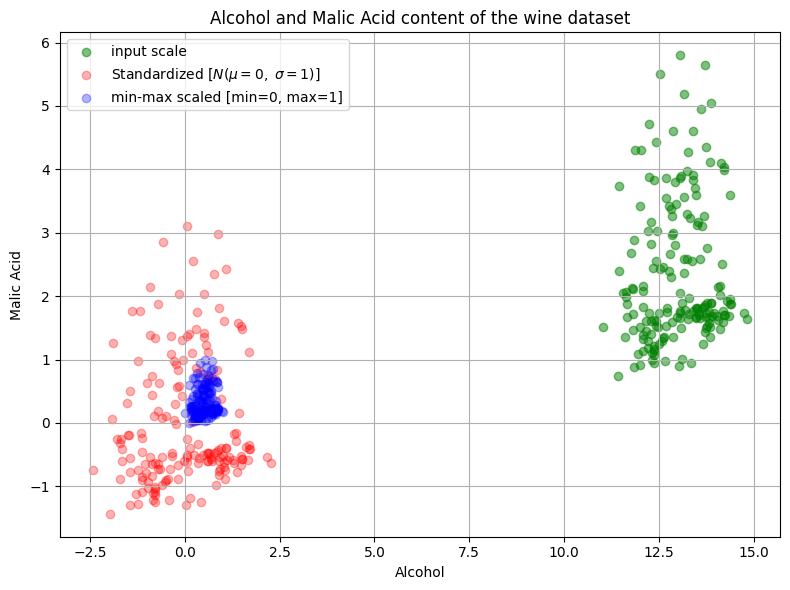

In [16]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

El gráfico anterior incluye la nube de puntos del *dataset* del vino en las diferentes escalas: la escala de entrada donde se midió el contenido de alcohol en porcentaje de volumen y el ácido málico en gramos por litro (verde), las variables estandarizadas/normalizadas (rojo) y las variables escaladas (azul).
En el siguiente gráfico, ampliaremos las tres escalas de ejes diferentes.

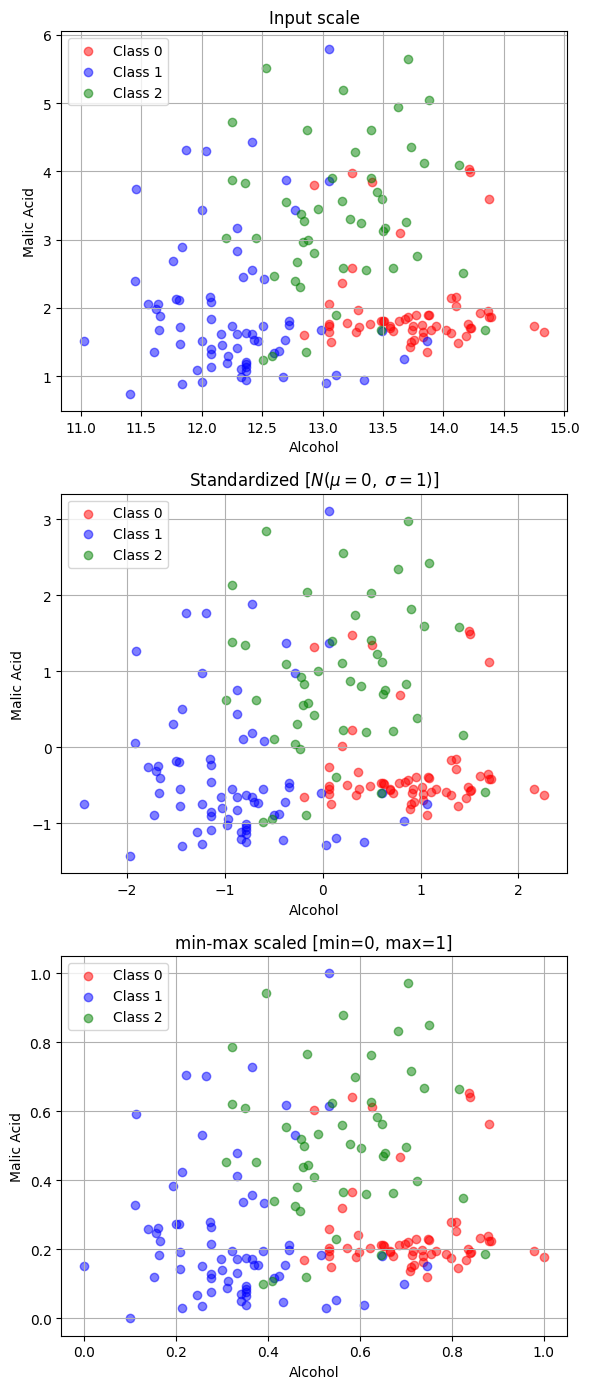

In [17]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [$N  (\mu=0, \; \sigma=1)$]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(0,3), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

#### Comparar variables de diferentes escalas

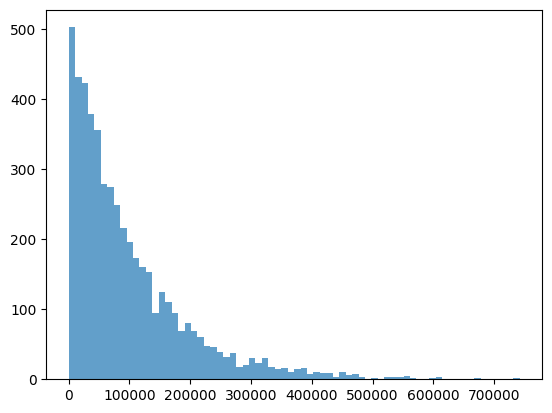

In [18]:
from scipy import stats
price_madrid = stats.gamma.rvs(1, size=5000)*100000

plt.hist(price_madrid, 70, histtype="stepfilled", alpha=.7);

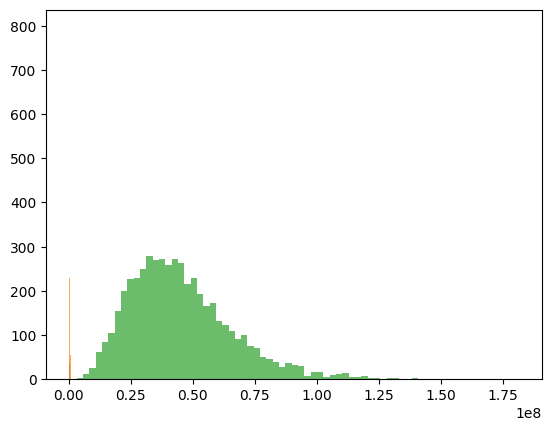

In [19]:
# Precios de casas en diferentes monedas
from scipy import stats
import matplotlib.pyplot as plt
price_madrid = stats.gamma.rvs(1, size=5000)*100000
price_london = stats.gamma(5).rvs(5000)*100000*0.87
price_spetesbourg = stats.gamma(5).rvs(5000)*100000*90.23

plt.hist(price_madrid, 70, alpha = .7)
plt.hist(price_london, 70, alpha = .7)
plt.hist(price_spetesbourg, 70, alpha = .7);

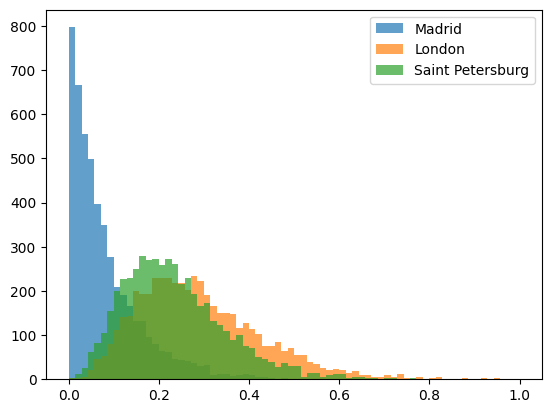

In [20]:
df = pd.DataFrame({'Madrid': price_madrid,
                  'London': price_london,
                  'Saint Petersburg': price_spetesbourg})

minmax_scale = preprocessing.MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)

plt.hist(df_minmax[:, 0], 70, histtype="stepfilled", alpha=.7, label='Madrid')
plt.hist(df_minmax[:, 1], 70, histtype="stepfilled", alpha=.7, label='London')
plt.hist(df_minmax[:, 2], 70, histtype="stepfilled", alpha=.7, label='Saint Petersburg')
plt.legend();

### <a id='Enfoques'>Enfoques</a>

<a href='#Sections'>[volver al inicio]</a>

Por supuesto, también podemos codificar las ecuaciones para la estandarización y el escalado Mín-Máx "manualmente". Sin embargo, los métodos scikit-learn siguen siendo útiles si trabaja con conjuntos de datos de prueba y entrenamiento y desea escalarlos por igual.

E.g., 
<pre>
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
</pre>

A continuación, realizaremos los cálculos utilizando código Python "puro" y una solución NumPy, que es especialmente útil si intentamos transformar una matriz por completo.

Solo para recordar las ecuaciones que estamos utilizando:

**<font color='orange'>Estandarización/Normalización</font>**: 

\begin{equation} z = \frac{x - \mu}{\sigma} \end{equation} 

con media:  

\begin{equation}\mu = \frac{1}{N} \sum_{i=1}^N (x_i)\end{equation}

y desviación estandar:  

\begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}\end{equation}


**<font color='orange'>Escalado Min-Max</font>**: 

\begin{equation} X_{scal} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}




#### Puro Python

In [21]:
# Estandarización/Normalización

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

# Escalado Min-Max

minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

#### NumPy

In [22]:
import numpy as np

# Estandarización/Normalización

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Escalado Min-Max

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

#### Visualización

Solo para asegurarnos de que nuestro código funcione correctamente, visualicemos los resultados a través de matplotlib.

In [23]:
%matplotlib inline

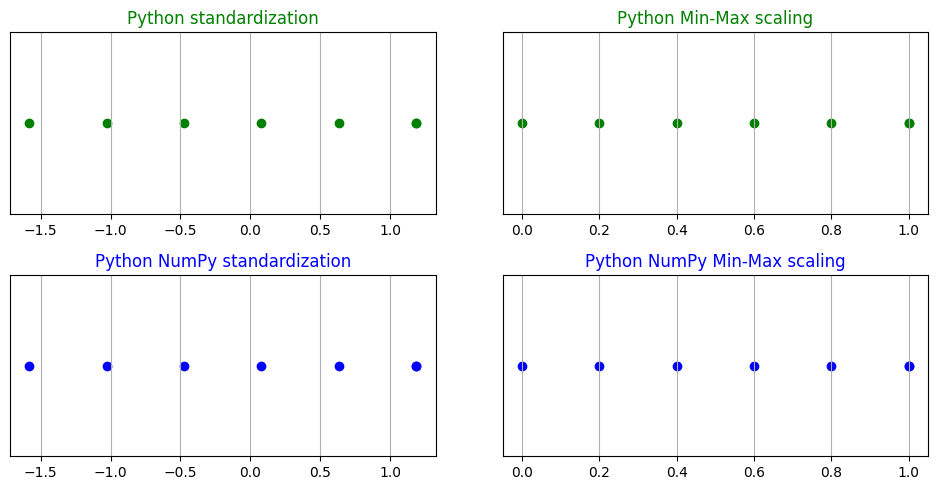

In [24]:
from matplotlib import pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')

plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

#### *Binning* (agrupamiento)

In [25]:
import pandas as pd

fcc_survey_df = pd.read_csv('fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


#### *Fixed-width binning*

##### Distribución de edades de los desarrolladores

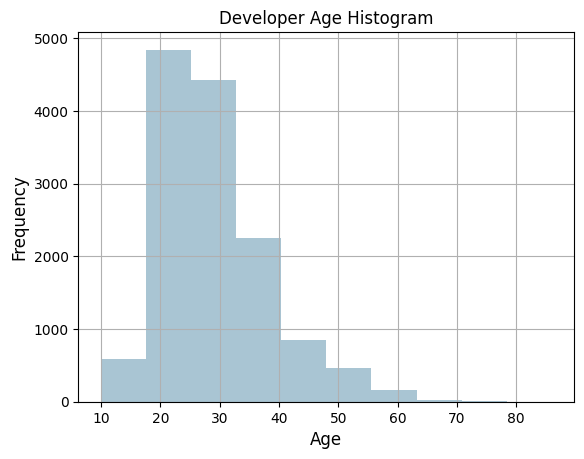

In [26]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

##### *Binning* basado en redondeo


```
Rango de edad : Bin
------------------
 0 -  9       :    0
10 - 19       :    1
20 - 29       :    2
30 - 39       :    3
40 - 49       :    4
50 - 59       :    5
60 - 69       :    6
  ... y así sucesivamente
```

In [27]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


##### *Binning* basado en rangos personalizados

``` 
Rango de edad : Bin
-------------------
 0 -  15      : 1
16 -  30      : 2
31 -  45      : 3
46 -  60      : 4
61 -  75      : 5
75 - 100      : 6
```

In [28]:
fcc_survey_df['Age'].unique()

array([28., 22., 19., 26., 20., 34., 23., 35., 33., 57., 47., nan, 37.,
       31., 27., 29., 30., 32., 25., 44., 21., 24., 18., 39., 41., 43.,
       36., 40., 38., 16., 46., 15., 14., 50., 49., 45., 55., 51., 17.,
       53., 52., 48., 56., 42., 54., 58., 65., 59., 75., 61., 80., 62.,
       60., 66., 12., 11., 13., 63., 64., 70., 73., 69., 71., 68., 86.,
       10., 67., 72.])

In [35]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']),
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']),
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round',
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


In [40]:
# Metodo por cuartiles
print(pd.qcut(np.array(fcc_survey_df['Age']), q=6))
fcc_survey_df['Age_bin_q'] = pd.qcut(np.array(fcc_survey_df['Age']), q=6)
fcc_survey_df.head()

[(27.0, 31.0], (21.0, 24.0], (9.999, 21.0], (24.0, 27.0], (9.999, 21.0], ..., (37.0, 86.0], (24.0, 27.0], (31.0, 37.0], (24.0, 27.0], (21.0, 24.0]]
Length: 15620
Categories (6, interval[float64, right]): [(9.999, 21.0] < (21.0, 24.0] < (24.0, 27.0] < (27.0, 31.0] < (31.0, 37.0] < (37.0, 86.0]]


,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label,Age_bin_q
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0,2.0,"(15, 30]",2,"(27.0, 31.0]"
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN,2.0,"(15, 30]",2,"(21.0, 24.0]"
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN,1.0,"(15, 30]",2,"(9.999, 21.0]"
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0,2.0,"(15, 30]",2,"(24.0, 27.0]"
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN,2.0,"(15, 30]",2,"(9.999, 21.0]"


In [30]:
# Agrupación marginal

def bin_ages(x):
    if x >= 0 and x <=15:
        return 1
    pass

fcc_survey_df['Age_bin_custom_label'] = fcc_survey_df['Age'].apply(bin_ages)

In [37]:
fcc_survey_df.loc[fcc_survey_df['Age_bin_custom_label'] == 1]

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
108,f782065928d3abbecdce9ab3a9b963a5,15.0,NaN,United States of America,NaN,Not working but looking for work,NaN,female,NaN,work for a medium-sized company,Mobile Developer,English,NaN,some high school,NaN,1.0,"(0, 15]",1
146,ec1a1572ef436f83371376300211e392,14.0,NaN,United States of America,NaN,NaN,NaN,male,NaN,work for a medium-sized company,Full-Stack Web Developer,English,NaN,no high school (secondary school),NaN,1.0,"(0, 15]",1
397,373403845b898831f86fd0ac8fdf73fe,14.0,NaN,United States of America,NaN,Not working and not looking for work,NaN,male,NaN,start your own business,NaN,English,NaN,no high school (secondary school),NaN,1.0,"(0, 15]",1
420,8bdf8e6aee32594c183fe59f422e5559,14.0,NaN,United States of America,NaN,Not working and not looking for work,NaN,male,NaN,start your own business,NaN,English,NaN,some high school,NaN,1.0,"(0, 15]",1
655,456a157f8f901415f4d1972aaf4730f4,15.0,NaN,NaN,NaN,NaN,80000.0,male,NaN,work for a startup,Full-Stack Web Developer,English,NaN,some high school,NaN,1.0,"(0, 15]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14943,ba567a3b9c3000bd1f0fc0ed98b8fff9,14.0,NaN,United States of America,software development and IT,Self-employed business owner,100000.0,male,12000.0,work for a medium-sized company,Full-Stack Web Developer,English,NaN,some high school,NaN,1.0,"(0, 15]",1
14948,8990ad658031ff69a702195839c1f3a7,14.0,NaN,Denmark,NaN,Employed for wages,NaN,female,17604.0,freelance,NaN,Danish,NaN,NaN,NaN,1.0,"(0, 15]",1
14969,bcb3abff383fbb46dd270eb5b2245341,15.0,NaN,United States of America,software development and IT,Self-employed freelancer,NaN,male,18000.0,NaN,NaN,English,NaN,"some college credit, no degree",NaN,1.0,"(0, 15]",1
14990,b9f38707211ffbb4b65991e9e6b3d7b4,15.0,NaN,United States of America,education,Self-employed freelancer,NaN,female,24000.0,start your own business,NaN,Indonesian,NaN,some high school,NaN,1.0,"(0, 15]",1
